In [353]:
import numpy as np
import matplotlib.pyplot as plt
import math

#opruga uvek utice negativno na intenzitet brzine, kada idemo od nje ona nas vuce nazad, kada idemo ka njoj i suzbijamo je - ona nas gura od sebe

def differential_equation(v, x, t, m, k, mu_s, mu_d, g):
    dxdt = v

    #dvdt = (-k * x - mu_s * g * np.sign(v) - mu_d * g * v) / m
    dvdt = -k * x / m - mu_s * g * np.sign(v) - mu_d * g * v

    return dvdt, dxdt



In [354]:
def runge_kutta_method(f, v0, x0, t, m, k, mu_s, mu_d, g):
    h = t[1] - t[0]
    v = np.zeros_like(t)
    x = np.zeros_like(t)
    v[0] = v0
    x[0] = x0
    counter = 0

    for i in range(1, len(t)): 

        k1v, k1x = f(v[i-1], x[i-1], t[i-1], m, k, mu_s, mu_d, g)
        k1v, k1x = h * k1v, h * k1x

        k2v, k2x = f(v[i-1] + 0.5*k1v, x[i-1] + 0.5*k1x, t[i-1] + 0.5*h, m, k, mu_s, mu_d, g)
        #k2v, k2x = f(v[i-1] + 0.5*k1v, x[i-1] + 0.5*k1x, t[i-1], m, k, mu_s, mu_d, g)
        #k2v, k2x = f(v[i-1] + 0.5*k1v, x[i-1] + 0.5*k1x, t[i], m, k, mu_s, mu_d, g)
        k2v, k2x = h * k2v, h * k2x

        k3v, k3x = f(v[i-1] + 0.5*k2v, x[i-1] + 0.5*k2x, t[i-1] + 0.5*h, m, k, mu_s, mu_d, g)
        #k3v, k3x = f(v[i-1] + 0.5*k2v, x[i-1] + 0.5*k2x, t[i-1], m, k, mu_s, mu_d, g)
        #k3v, k3x = f(v[i-1] + 0.5*k2v, x[i-1] + 0.5*k2x, t[i], m, k, mu_s, mu_d, g)
        k3v, k3x = h * k3v, h * k3x
        
        k4v, k4x = f(v[i-1] + k3v, x[i-1] + k3x, t[i-1] + h, m, k, mu_s, mu_d, g)
        #k4v, k4x = f(v[i-1] + k3v, x[i-1] + k3x, t[i-1] + 0.5*h, m, k, mu_s, mu_d, g)
        k4v, k4x = h * k4v, h * k4x

        v[i] = v[i-1] + (k1v + 2*k2v + 2*k3v + k4v) / 6
        x[i] = x[i-1] + (k1x + 2*k2x + 2*k3x + k4x) / 6

        #alternativni kriterijum zaustvaljanja
        #if max(v[i], 3.0) == 3.0:
        #    counter += 1
        #    if counter == (len(t) / 10):
        #        break

        if v[i] == v[i-1]:
            #print(counter)
            counter += 1
            if counter == 10:
                break

    return v, x

In [355]:
#napomena:problem nije dovoljno kompleksan da bi se videle razlike u kvalitetu rada nekih numerickih metoda, pogotovo ako uzmemo manji vremenski korak

#napomena:sto veca masa to manja promena, za vece telo ce trebati vise vremena da promeni svoje stanje

#Parametri

#m = 10.0 # masa tela
m = 20.0
#m = 50.0  

k = 0.1  # koeficijent opruge

mu_s = 0.02  # koeficijent statičkog trenja

mu_d = 0.01  # koeficijent dinamičkog trenja
#mu_d = 0

g = 9.81  # ubrzanje usled gravitacije

# Vremenski korak i vremenski opseg
#h = 2
#h = 1
h = 0.5
#h = 0.2
#h = 0.1
#h = 0.02
#h = 0.01
#h = 0.002
#h = 0.001

t = np.arange(0, 1100, h)

# Početna brzina i početna deformacija opruge (pozicija)
v0 = 100.0
x0 = 1.0


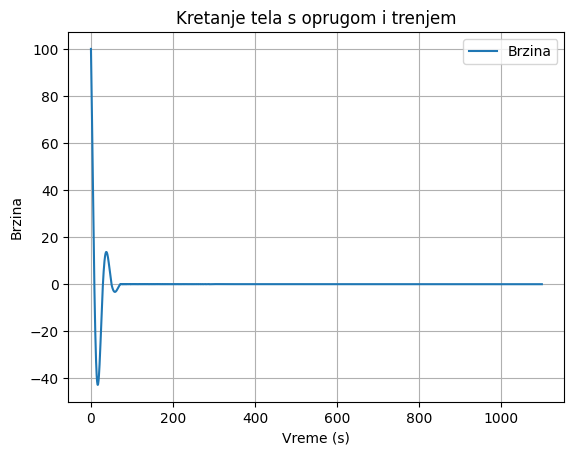

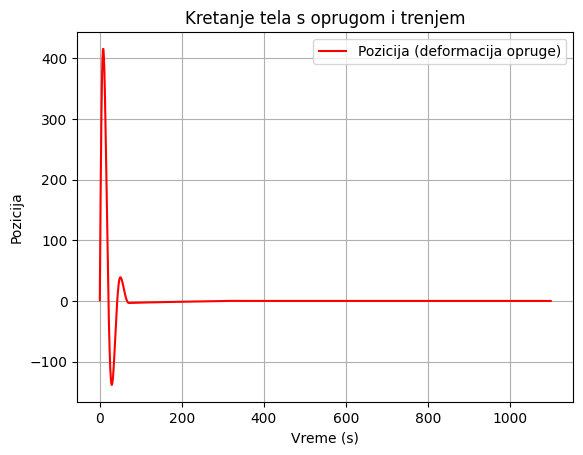

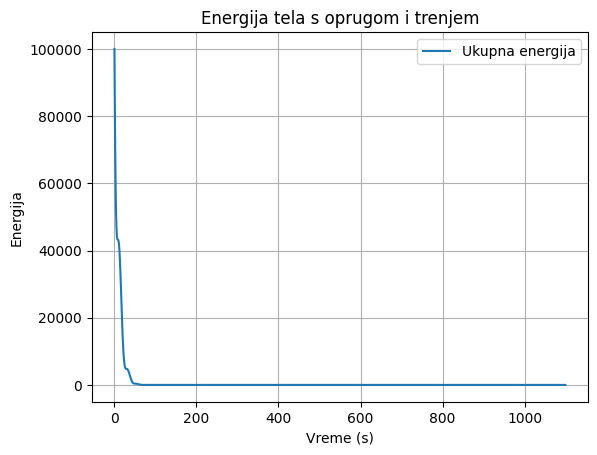

In [356]:
# Rešavanje diferencijalne jednačine Runge-Kutta metodom
v, x = runge_kutta_method(differential_equation, v0, x0, t, m, k, mu_s, mu_d, g)

# Prikaz rezultata
plt.plot(t, v, label='Brzina')
plt.xlabel('Vreme (s)')
plt.ylabel('Brzina')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

# Prikaz rezultata
plt.plot(t, x, label='Pozicija (deformacija opruge)', color='red')
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

#energija (ovo je moglo biti racunato u okviru numerickog metoda - kod bi bio identican, samo bi se koristili indeksi umesto vektora)
#kinecticka
kinetic_energy = 0.5 * m * v**2
#potencijalna - posto nam u ovom problemu visina nije relevantna, ne koristimo Ep = mgh formulu, vec formulu koja zavisi od elasticnosti za potencijalnu energiju
potential_energy = 0.5 * k * x**2
#Ukupna mehanička energija tela (sumiramo kinetičku i potencijalnu energiju)
total_energy = kinetic_energy + potential_energy

#plt.plot(t, kinetic_energy, label='Kinetička energija')
#plt.plot(t, potential_energy, label='Potencijalna energija')
plt.plot(t, total_energy, label='Ukupna energija')
plt.xlabel('Vreme (s)')
plt.ylabel('Energija')
plt.title('Energija tela s oprugom i trenjem')
plt.legend()
plt.grid(True)

In [357]:
def euler_method(f, v0, x0, t, m, k, mu_s, mu_d, g):
    h = t[1] - t[0]
    v = np.zeros_like(t)
    x = np.zeros_like(t)
    v[0] = v0
    x[0] = x0

    for i in range(1, len(t)):
        dvdt, dxdt = f(v[i-1], x[i-1], t[i-1], m, k, mu_s, mu_d, g)
        v[i] = v[i-1] + dvdt * h
        x[i] = x[i-1] + dxdt * h

    return v, x

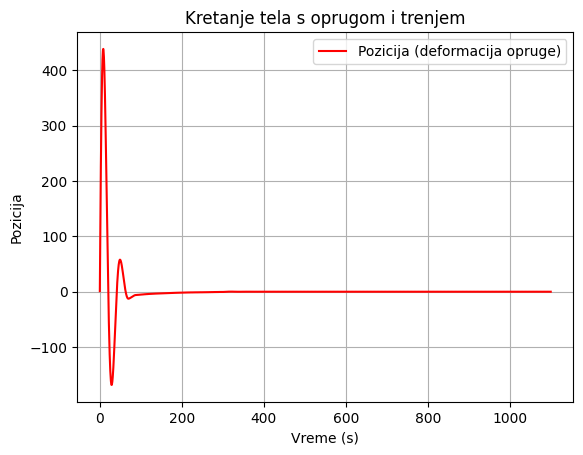

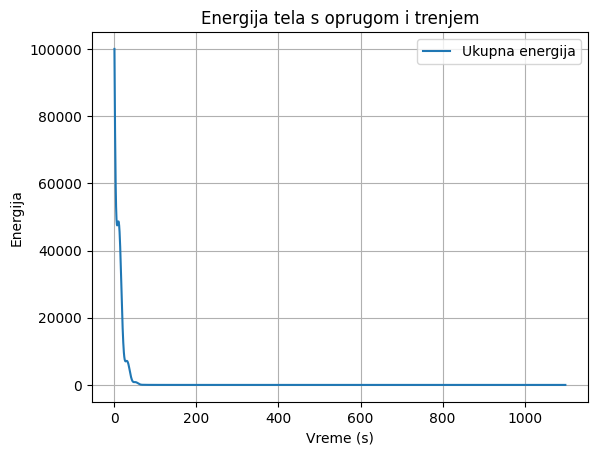

In [358]:
# Rešavanje diferencijalne jednačine Ojler unapred metodom
ve, xe = euler_method(differential_equation, v0, x0, t, m, k, mu_s, mu_d, g)

# Prikaz rezultata
plt.plot(t, xe, label='Pozicija (deformacija opruge)', color='red')
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

kinetic_energy_e = 0.5 * m * ve**2
potential_energy_e = 0.5 * k * xe**2
total_energy_e = kinetic_energy_e + potential_energy_e

#plt.plot(t, kinetic_energy_e, label='Kinetička energija')
#plt.plot(t, potential_energy_e, label='Potencijalna energija')
plt.plot(t, total_energy_e, label='Ukupna energija')
plt.xlabel('Vreme (s)')
plt.ylabel('Energija')
plt.title('Energija tela s oprugom i trenjem')
plt.legend()
plt.grid(True)

In [359]:
def modified_euler_method(f, v0, x0, t, m, k, mu_s, mu_d, g):
    h = t[1] - t[0]
    v = np.zeros_like(t)
    x = np.zeros_like(t)
    v[0] = v0
    x[0] = x0

    for i in range(1, len(t)):
        k1v, k1x = f(v[i-1], x[i-1], t[i-1], m, k, mu_s, mu_d, g)
        v_middle = v[i-1] + 0.5 * k1v * h
        x_middle = x[i-1] + 0.5 * k1x * h
        k2v, k2x = f(v_middle, x_middle, t[i-1] + 0.5 * h, m, k, mu_s, mu_d, g)

        v[i] = v[i-1] + k2v * h
        x[i] = x[i-1] + k2x * h

    return v, x    

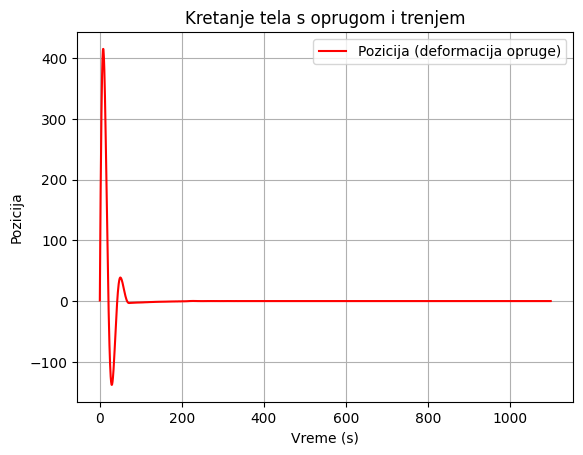

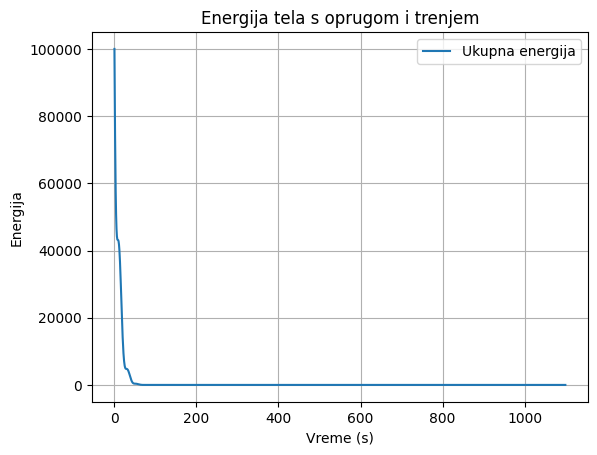

In [360]:
# Rešavanje diferencijalne jednačine modifikovanom Ojlerovom metodom
vem, xem = modified_euler_method(differential_equation, v0, x0, t, m, k, mu_s, mu_d, g)

# Prikaz rezultata
plt.plot(t, xem, label='Pozicija (deformacija opruge)', color='red')
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

kinetic_energy_em = 0.5 * m * vem**2
potential_energy_em = 0.5 * k * xem**2
total_energy_em = kinetic_energy_em + potential_energy_em

#plt.plot(t, kinetic_energy_em, label='Kinetička energija')
#plt.plot(t, potential_energy_em, label='Potencijalna energija')
plt.plot(t, total_energy_em, label='Ukupna energija')
plt.xlabel('Vreme (s)')
plt.ylabel('Energija')
plt.title('Energija tela s oprugom i trenjem')
plt.legend()
plt.grid(True)

In [361]:
def runge_kutta_alt_method(f, v0, x0, t, m, k, mu_s, mu_d, g):
    h = t[1] - t[0]
    v = np.zeros_like(t)
    x = np.zeros_like(t)
    v[0] = v0
    x[0] = x0
    counter = 0

    for i in range(1, len(t)): 

        k1v, k1x = f(v[i-1], x[i-1], t[i-1], m, k, mu_s, mu_d, g)
        k1v, k1x = h * k1v, h * k1x

        k2v, k2x = f(v[i-1] + k1v/3, x[i-1] + k1x/3, t[i-1] + h/3, m, k, mu_s, mu_d, g)
        k2v, k2x = h * k2v, h * k2x

        k3v, k3x = f(v[i-1] + k2v/3, x[i-1] + k2x/3, t[i-1] + h/3, m, k, mu_s, mu_d, g)
        k3v, k3x = h * k3v, h * k3x
        
        k4v, k4x = f(v[i-1] + k3v, x[i-1] + k3x, t[i-1] + h, m, k, mu_s, mu_d, g)
        k4v, k4x = h * k4v, h * k4x

        v[i] = v[i-1] + (k1v + 3*k2v + 3*k3v + k4v) / 8
        x[i] = x[i-1] + (k1x + 3*k2x + 3*k3x + k4x) / 8

        #alternativni kriterijum zaustvaljanja
        #if max(v[i], 3.0) == 3.0:
        #    counter += 1
        #    if counter == (len(t) / 10):
        #        break

        if v[i] == v[i-1]:
            print(counter)
            counter += 1
            if counter == 10:
                break

    return v, x

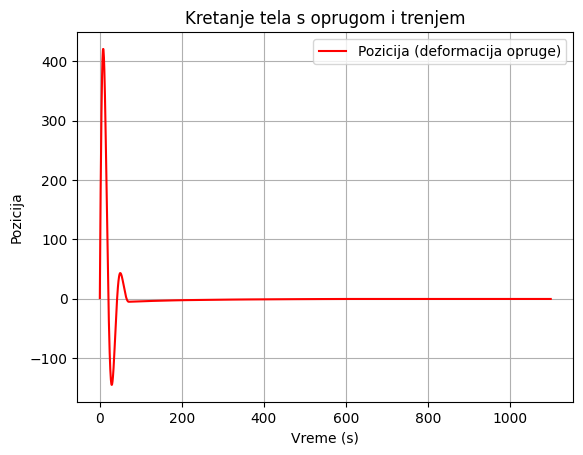

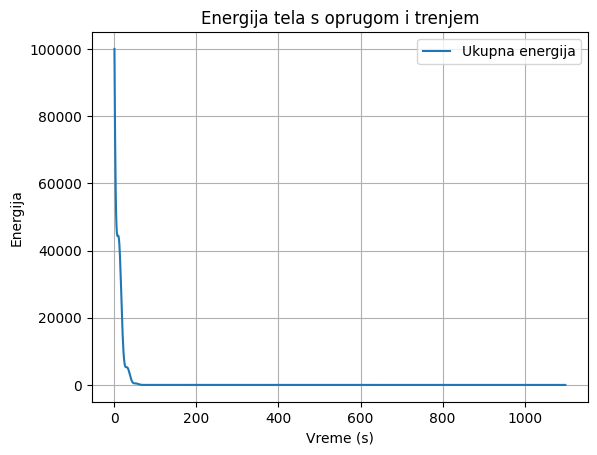

In [362]:
# Rešavanje diferencijalne jednačine alternativnim RK4 metodom
vm, xm = runge_kutta_alt_method(differential_equation, v0, x0, t, m, k, mu_s, mu_d, g)

# Prikaz rezultata
plt.plot(t, xm, label='Pozicija (deformacija opruge)', color='red')
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

kinetic_energy_m = 0.5 * m * vm**2
potential_energy_m = 0.5 * k * xm**2
total_energy_m = kinetic_energy_m + potential_energy_m

#plt.plot(t, kinetic_energy_m, label='Kinetička energija')
#plt.plot(t, potential_energy_m, label='Potencijalna energija')
plt.plot(t, total_energy_m, label='Ukupna energija')
plt.xlabel('Vreme (s)')
plt.ylabel('Energija')
plt.title('Energija tela s oprugom i trenjem')
plt.legend()
plt.grid(True)

In [363]:
def modified_euler_alt(f, v0, x0, t, m, k, mu_s, mu_d, g):
    h = t[1] - t[0]
    v = np.zeros_like(t)
    x = np.zeros_like(t)
    v[0] = v0
    x[0] = x0

    for i in range(1, len(t)):
        k1v, k1x = f(v[i-1], x[i-1], t[i-1], m, k, mu_s, mu_d, g)
        v_1 = k1v
        x_1 = k1x
        k2v, k2x = f(v[i-1] + h * v_1, x[i-1] + h * x_1, t[i-1] + h, m, k, mu_s, mu_d, g)
        v_2 = k2v
        x_2 = k2x

        v[i] = v[i-1] + ((v_2 + v_1) * 0.5 * h)
        x[i] = x[i-1] + ((x_2 + x_1) * 0.5 * h)

    return v, x    

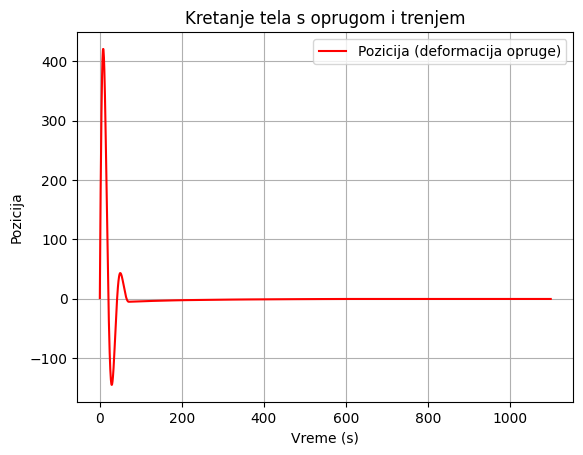

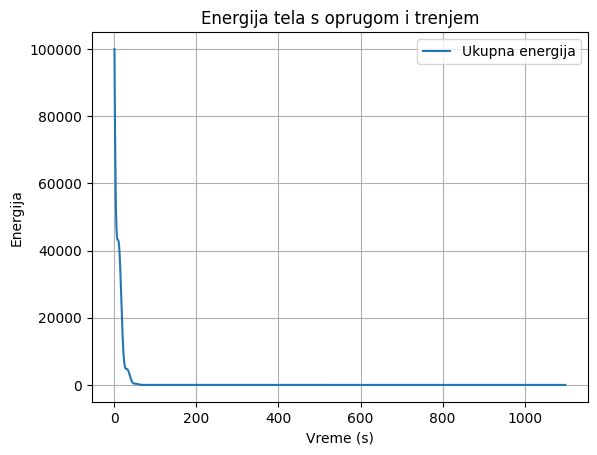

In [364]:
# Rešavanje diferencijalne jednačine drugom modifikacijom Ojlerovog metoda
vema, xema = modified_euler_alt(differential_equation, v0, x0, t, m, k, mu_s, mu_d, g)

# Prikaz rezultata
plt.plot(t, xm, label='Pozicija (deformacija opruge)', color='red')
plt.xlabel('Vreme (s)')
plt.ylabel('Pozicija')
plt.title('Kretanje tela s oprugom i trenjem')
plt.legend()
plt.grid(True)
plt.show()

kinetic_energy_ema = 0.5 * m * vema**2
potential_energy_ema = 0.5 * k * xema**2
total_energy_ema = kinetic_energy_ema + potential_energy_ema

#plt.plot(t, kinetic_energy_m, label='Kinetička energija')
#plt.plot(t, potential_energy_m, label='Potencijalna energija')
plt.plot(t, total_energy_ema, label='Ukupna energija')
plt.xlabel('Vreme (s)')
plt.ylabel('Energija')
plt.title('Energija tela s oprugom i trenjem')
plt.legend()
plt.grid(True)

In [365]:
#POREDJENJE NUMERICKIH METODA

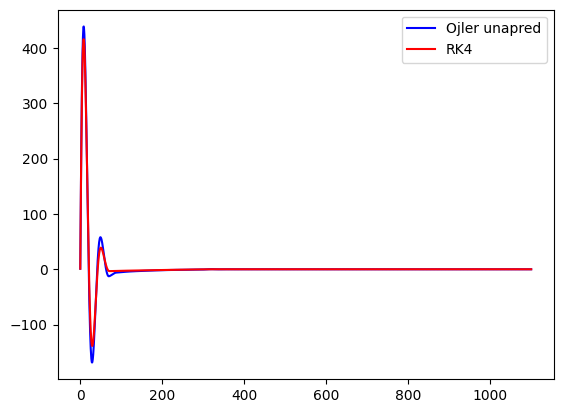

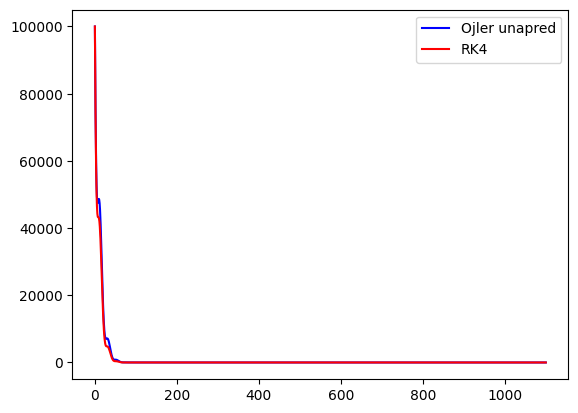

In [366]:
plt.plot(t, xe, label='Ojler unapred', color = 'blue')
plt.plot(t, x, label='RK4', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_e, label='Ojler unapred', color = 'blue')
plt.plot(t, total_energy, label='RK4', color = 'red')
plt.legend()
plt.show()

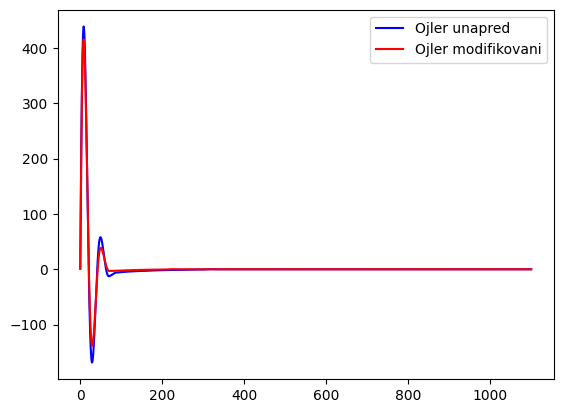

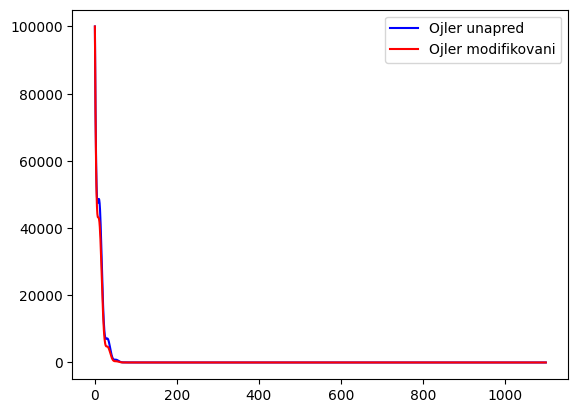

In [367]:
plt.plot(t, xe, label='Ojler unapred', color = 'blue')
plt.plot(t, xem, label='Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_e, label='Ojler unapred', color = 'blue')
plt.plot(t, total_energy_em, label='Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

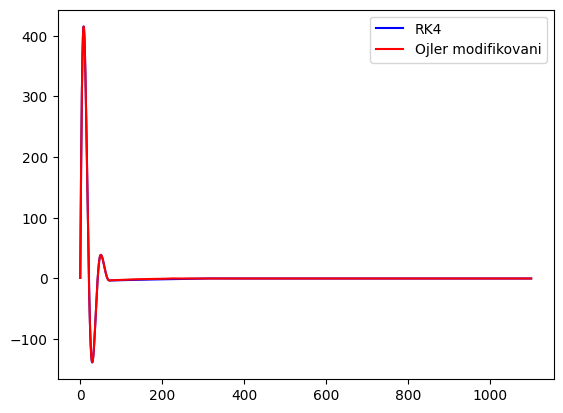

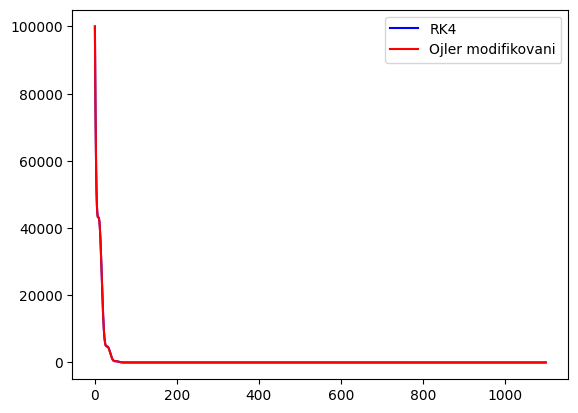

In [368]:
plt.plot(t, x, label='RK4', color = 'blue')
plt.plot(t, xem, label='Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy, label='RK4', color = 'blue')
plt.plot(t, total_energy_em, label='Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

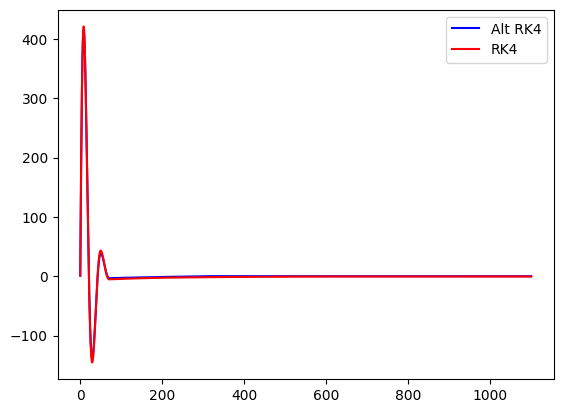

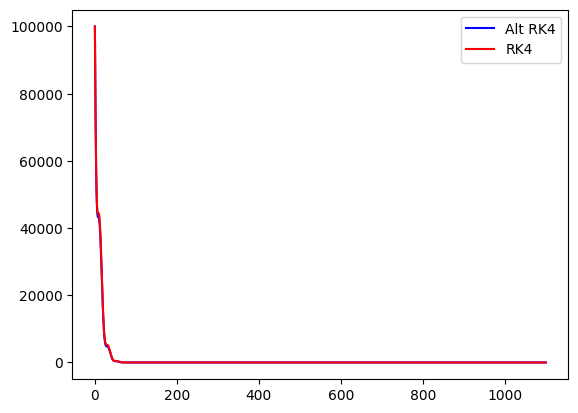

In [369]:
plt.plot(t, x, label='Alt RK4', color = 'blue')
plt.plot(t, xm, label='RK4', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy, label='Alt RK4', color = 'blue')
plt.plot(t, total_energy_m, label='RK4', color = 'red')
plt.legend()
plt.show()

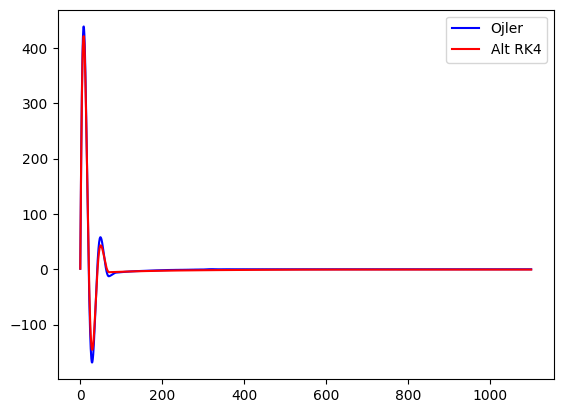

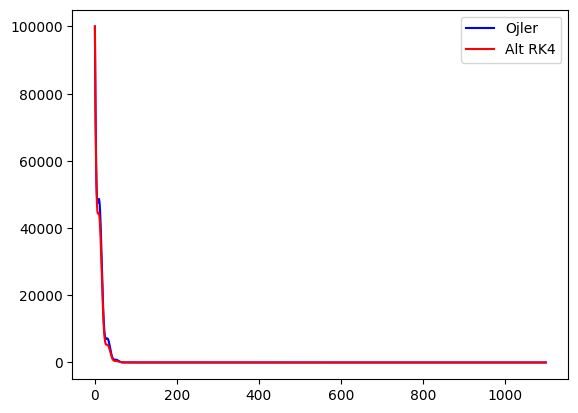

In [370]:
plt.plot(t, xe, label='Ojler', color = 'blue')
plt.plot(t, xm, label='Alt RK4', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_e, label='Ojler', color = 'blue')
plt.plot(t, total_energy_m, label='Alt RK4', color = 'red')
plt.legend()
plt.show()

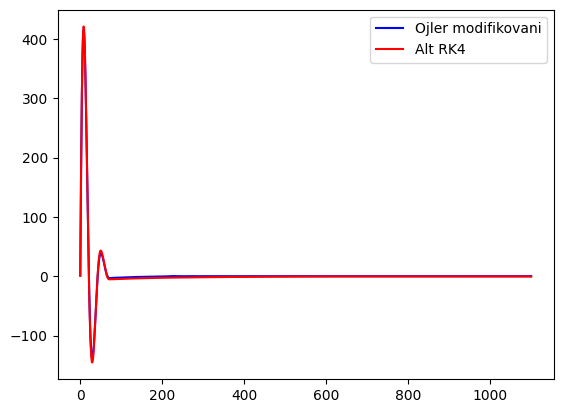

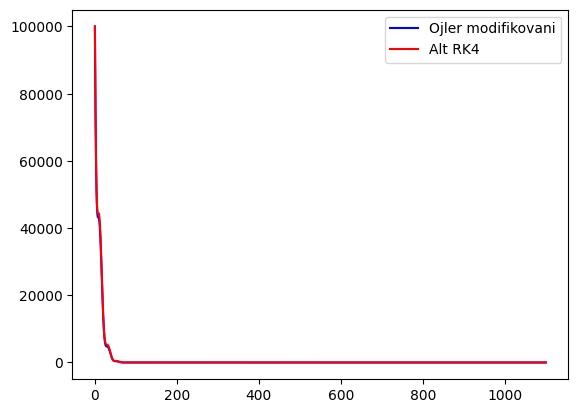

In [371]:
plt.plot(t, xem, label='Ojler modifikovani', color = 'blue')
plt.plot(t, xm, label='Alt RK4', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_em, label='Ojler modifikovani', color = 'blue')
plt.plot(t, total_energy_m, label='Alt RK4', color = 'red')
plt.legend()
plt.show()

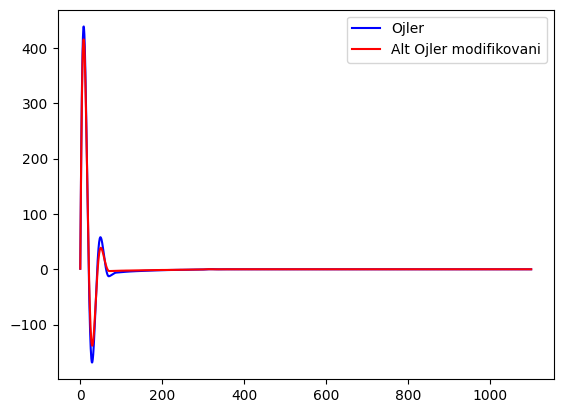

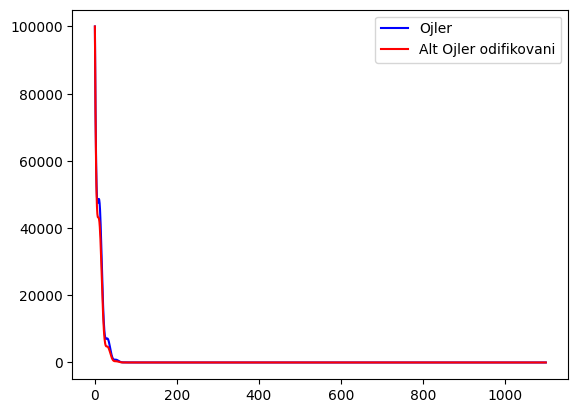

In [372]:
plt.plot(t, xe, label='Ojler', color = 'blue')
plt.plot(t, xema, label='Alt Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_e, label='Ojler', color = 'blue')
plt.plot(t, total_energy_ema, label='Alt Ojler odifikovani', color = 'red')
plt.legend()
plt.show()

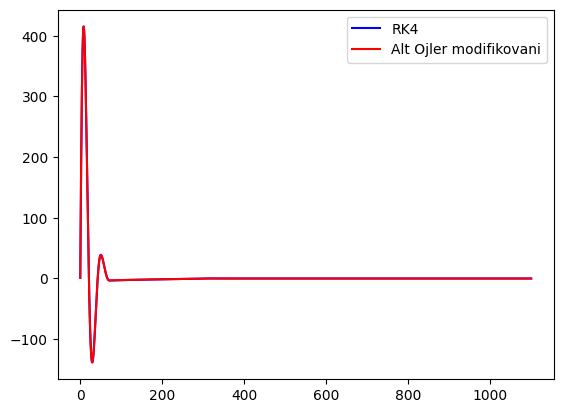

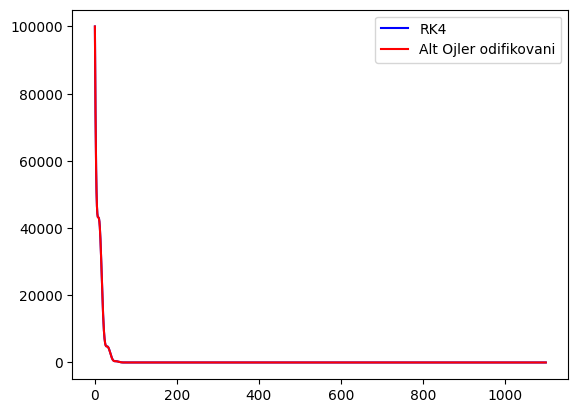

In [373]:
plt.plot(t, x, label='RK4', color = 'blue')
plt.plot(t, xema, label='Alt Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy, label='RK4', color = 'blue')
plt.plot(t, total_energy_ema, label='Alt Ojler odifikovani', color = 'red')
plt.legend()
plt.show()

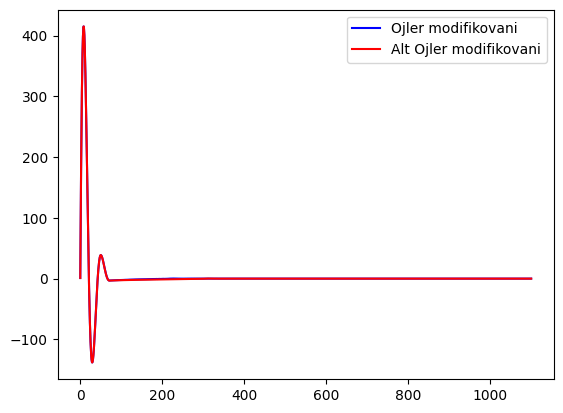

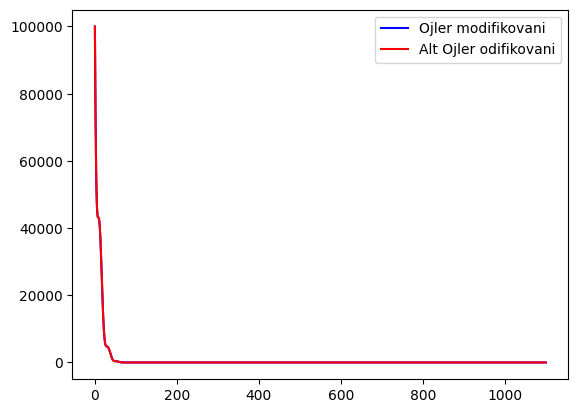

In [374]:
plt.plot(t, xem, label='Ojler modifikovani', color = 'blue')
plt.plot(t, xema, label='Alt Ojler modifikovani', color = 'red')
plt.legend()
plt.show()

plt.plot(t, total_energy_em, label='Ojler modifikovani', color = 'blue')
plt.plot(t, total_energy_ema, label='Alt Ojler odifikovani', color = 'red')
plt.legend()
plt.show()